<a href="https://colab.research.google.com/github/WorkwithAbhinav/Netflix_dv_project/blob/main/netflixidmb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Visualization project
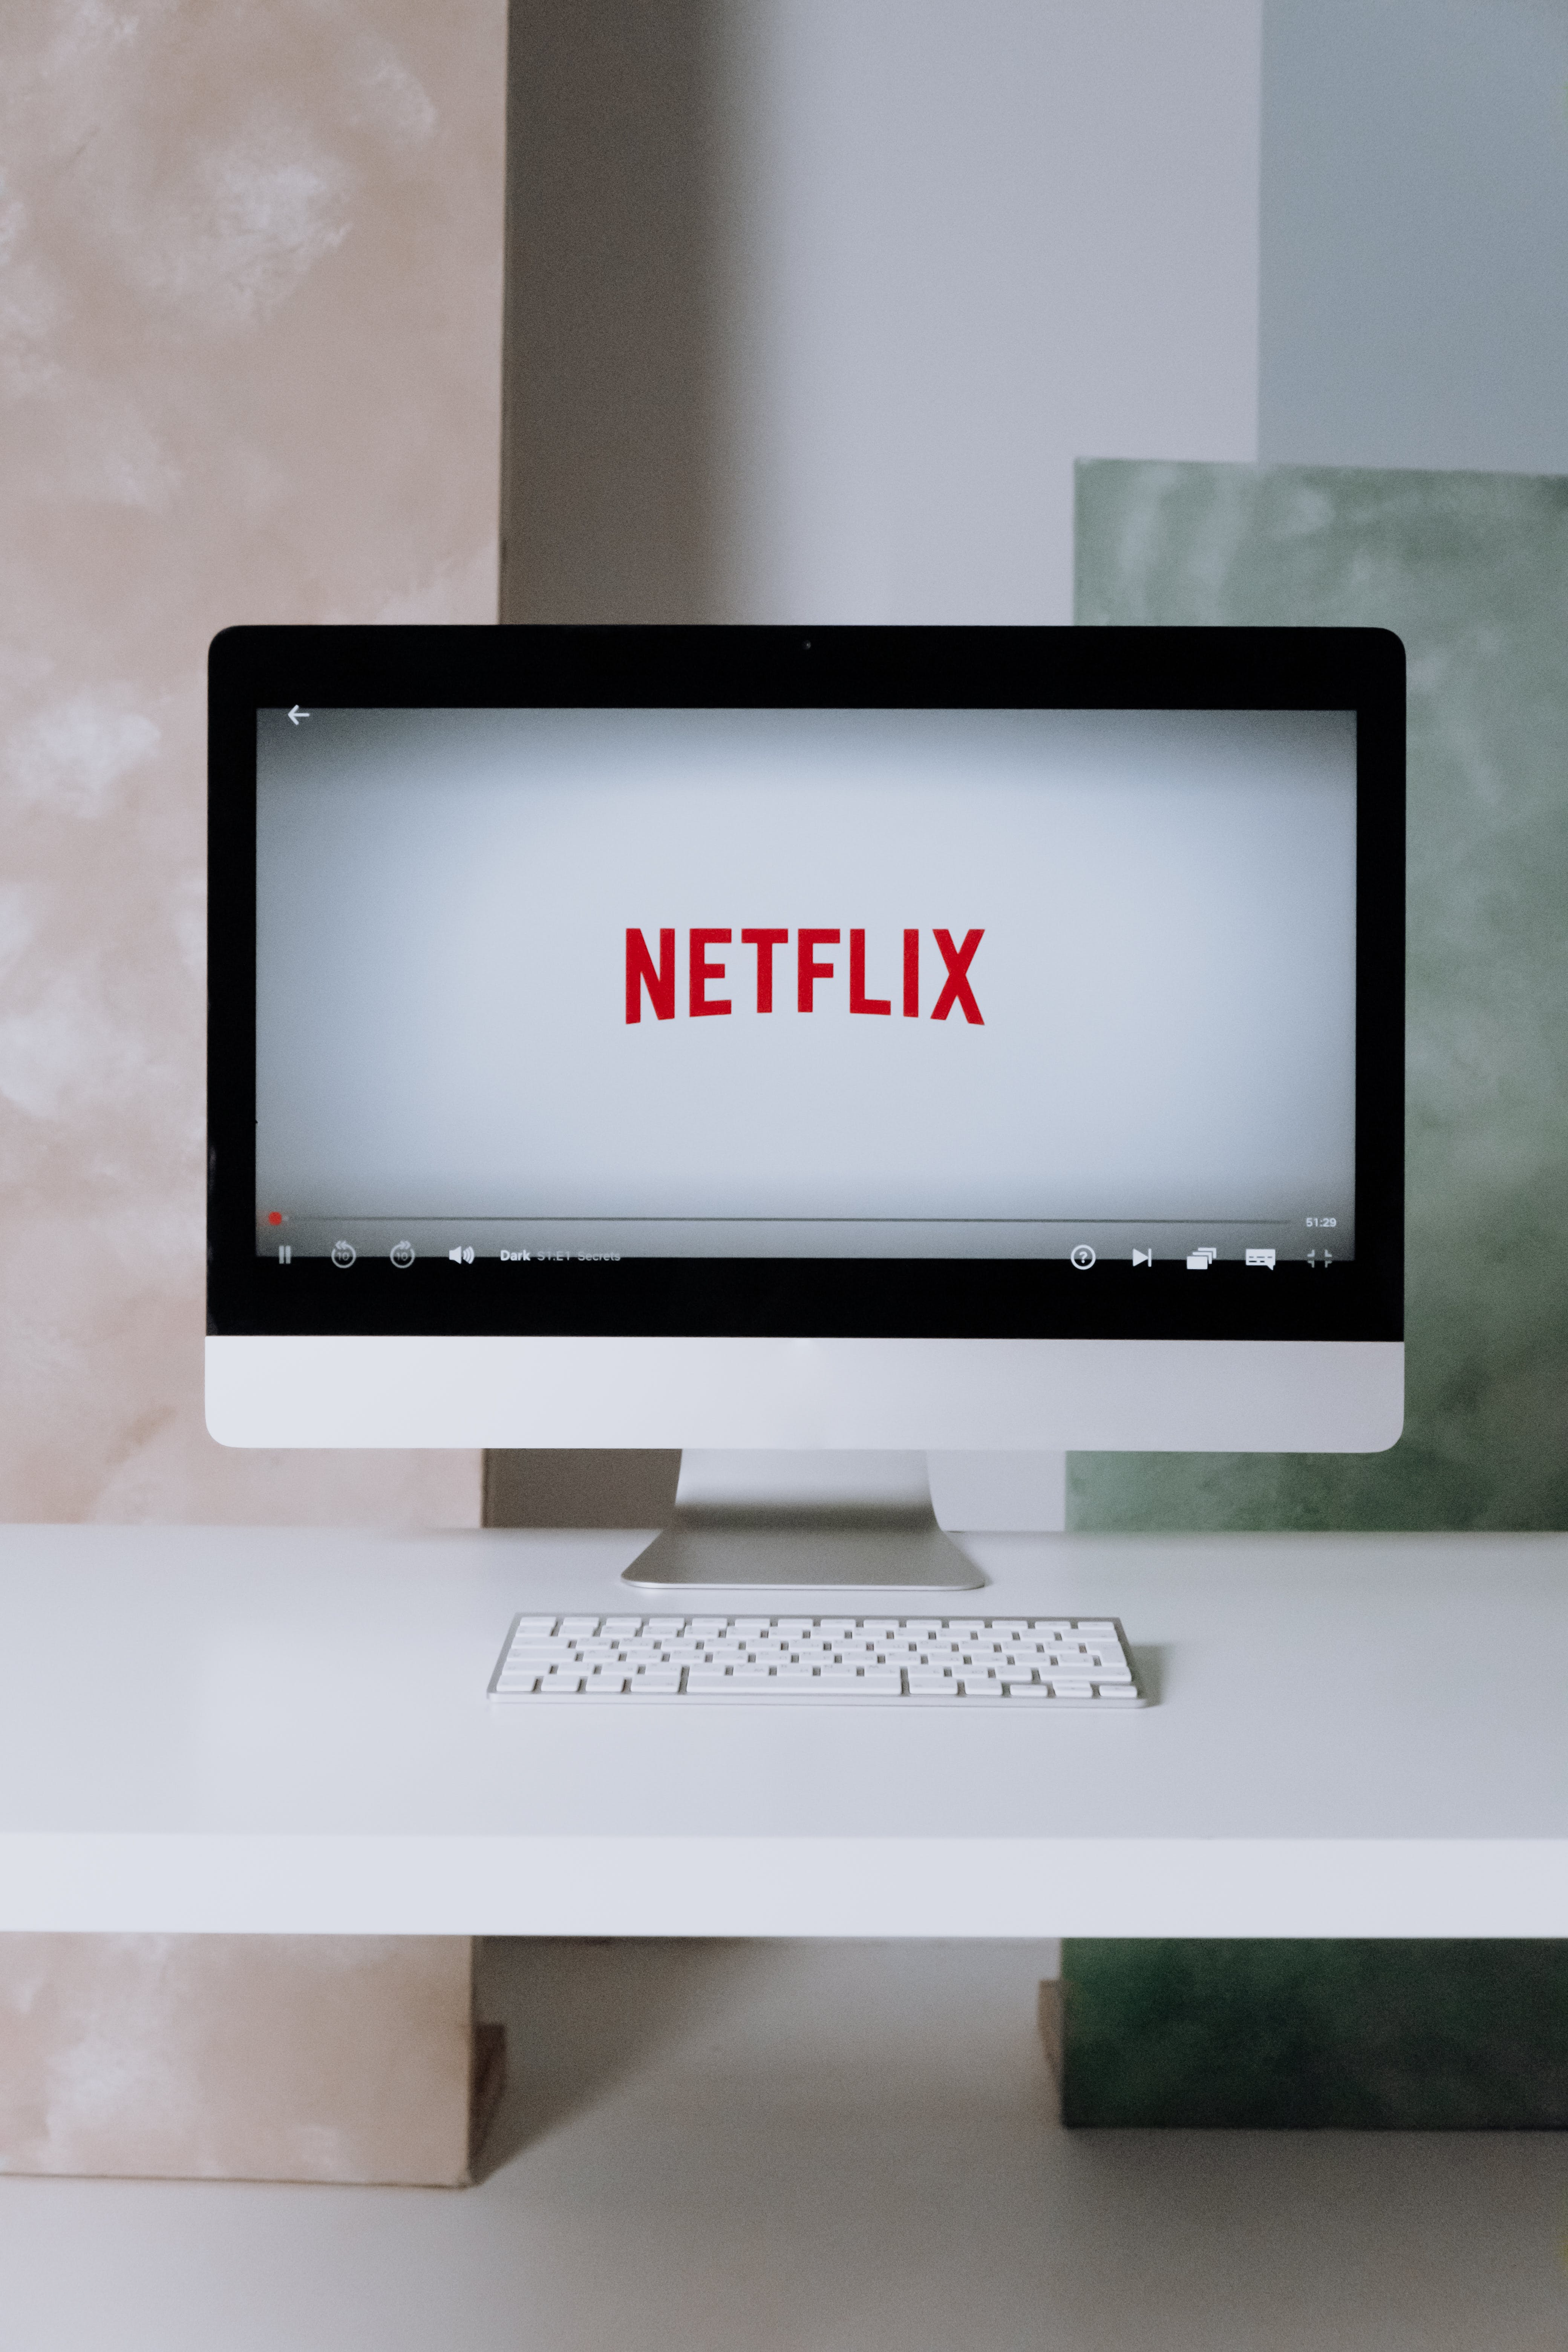

Step 1 ▶ Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 ▶ Imporind Data


In [ ]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')

In [ ]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


Step 3 ▶ Removing unnecessary series of data  

In [ ]:
df = df.drop(['description' , 'imdb_id' , 'id' , 'index'] ,axis =1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5283 non-null   object 
 1   type               5283 non-null   object 
 2   release_year       5283 non-null   int64  
 3   age_certification  2998 non-null   object 
 4   runtime            5283 non-null   int64  
 5   imdb_score         5283 non-null   float64
 6   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 289.0+ KB


In [ ]:
imdbscore = df['imdb_score']

In [ ]:
df = df.drop('imdb_score' ,axis =1)

In [ ]:
imdbscore.head()

0    8.3
1    8.2
2    8.0
3    8.1
4    8.8
Name: imdb_score, dtype: float64

Step 4 ▶ reversing imdb score column for future machine learning processes

In [ ]:
df['imdb_score'] = imdbscore

In [ ]:
df

,title,type,release_year,age_certification,runtime,imdb_votes,imdb_score
0,Taxi Driver,MOVIE,1976,R,113,795222.0,8.3
1,Monty Python and the Holy Grail,MOVIE,1975,PG,91,530877.0,8.2
2,Life of Brian,MOVIE,1979,R,94,392419.0,8.0
3,The Exorcist,MOVIE,1973,R,133,391942.0,8.1
4,Monty Python's Flying Circus,SHOW,1969,TV-14,30,72895.0,8.8
...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,26.0,5.8
5279,Fine Wine,MOVIE,2021,NaN,100,39.0,6.9
5280,Clash,MOVIE,2021,NaN,88,32.0,6.5
5281,Shadow Parties,MOVIE,2021,NaN,116,9.0,6.2


In [ ]:
df['age_certification'].value_counts()

TV-MA    792
R        548
TV-14    436
PG-13    424
PG       238
TV-PG    172
G        105
TV-Y7    104
TV-Y      94
TV-G      72
NC-17     13
Name: age_certification, dtype: int64

Step 5 ▶ cleaning data replacing arr the NaN values with forward fill method

In [ ]:
df.fillna(method = 'ffill' , inplace = True)

In [ ]:
df['age_certification'].value_counts()

TV-MA    1334
R         838
PG-13     748
TV-14     746
PG        458
TV-PG     314
G         303
TV-Y7     203
TV-Y      200
TV-G      117
NC-17      22
Name: age_certification, dtype: int64

In [ ]:
df['imdb_score'].value_counts()

6.6    201
6.8    199
6.5    193
6.2    192
7.4    190
      ... 
2.0      1
1.9      1
2.4      1
1.6      1
1.8      1
Name: imdb_score, Length: 81, dtype: int64

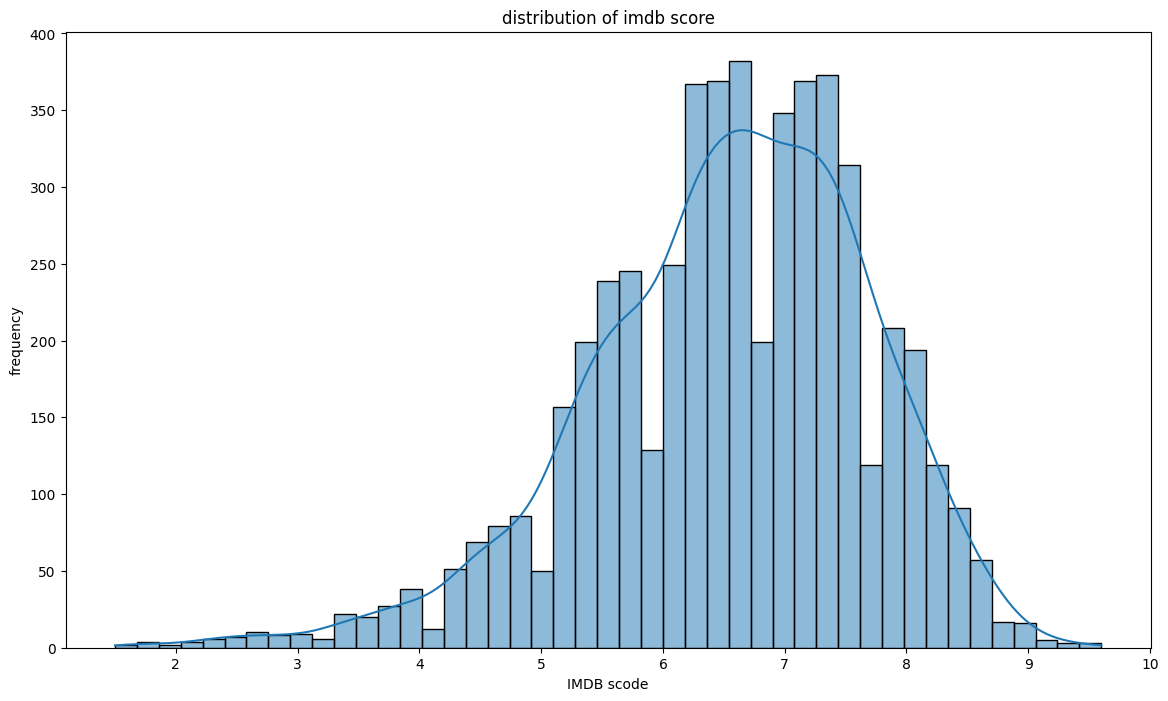

In [ ]:
plt.figure(figsize=(14, 8))  # Adjust the dimensions as needed
sns.histplot(df['imdb_score'] , kde = True)
plt.xlabel('IMDB scode')
plt.ylabel('frequency')
plt.title('distribution of imdb score')
plt.show()

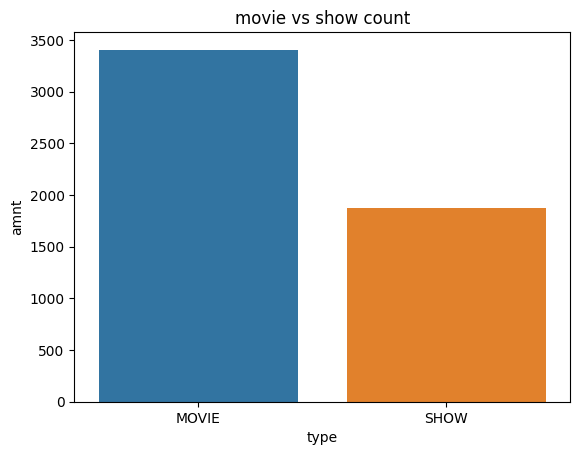

In [ ]:
sns.countplot(data = df , x = 'type')
plt.xlabel('type')
plt.ylabel('amnt')
plt.title('movie vs show count')
plt.show()

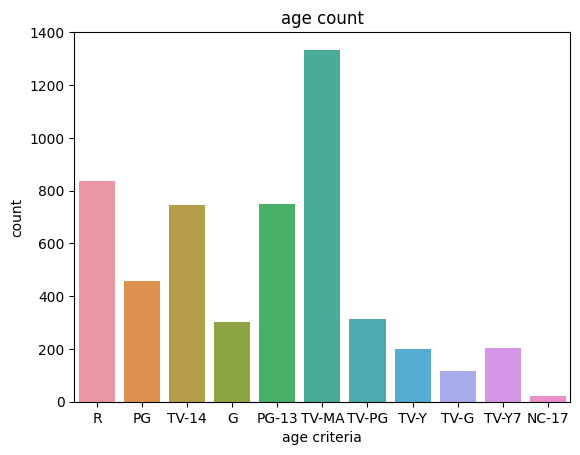

In [ ]:
sns.countplot(data = df , x = 'age_certification')
plt.xlabel('age criteria')
plt.ylabel('count')
plt.title('age count')
plt.show()

In [ ]:
dataf = pd.DataFrame({"runtime" : df.runtime , "imdb_score" : df.imdb_score})

In [ ]:
dataf

,runtime,imdb_score
0,113,8.3
1,91,8.2
2,94,8.0
3,133,8.1
4,30,8.8
...,...,...
5278,108,5.8
5279,100,6.9
5280,88,6.5
5281,116,6.2


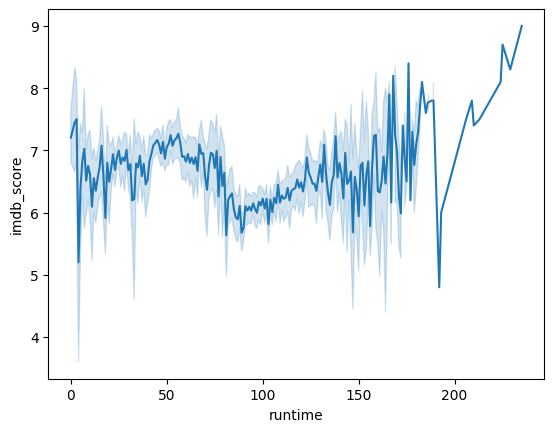

In [ ]:
sns.lineplot(x= 'runtime' , y = 'imdb_score',data = dataf)
plt.show()

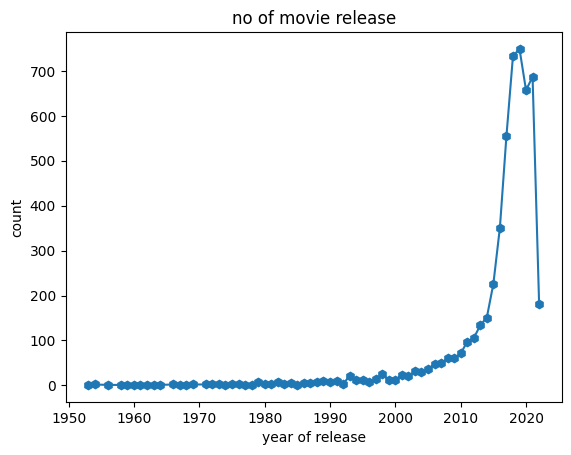

In [ ]:
releasey= df['release_year'].value_counts().sort_index()
plt.plot(releasey.index , releasey.values , marker= 'h')
plt.xlabel('year of release')
plt.ylabel('count')
plt.title('no of movie release')
plt.show()

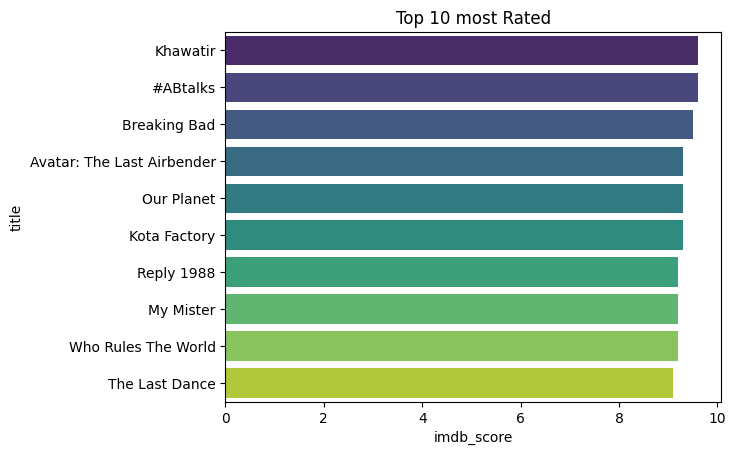

In [ ]:
toprated= df.nlargest(10 , 'imdb_score')
sns.barplot(x='imdb_score' , y ='title' , data=toprated , palette='viridis')
plt.title('Top 10 most Rated')
plt.show()